In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
from time import time
import tensorflow
from tensorflow.keras import models
from tensorflow.keras.layers import *

In [2]:
fred_md = pd.read_csv("data/Fred_MD_Current.csv")
fred_md.drop(0,axis=0, inplace=True) #Dropping the first row because it contains the transfotmation values. For this data look at fred_md_metadata.tcode.
fred_md.set_index("sasdate", inplace=True)
fred_md_metadata = pd.read_csv("data/FRED-MD_Metadata.csv", encoding='iso-8859-1')
fred_md.index = pd.to_datetime(fred_md.index)
fred_md.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1959-01-01,2583.560,2426.0,15.188,276676.8154,18235.77392,21.9665,23.3891,22.2688,31.7011,19.0149,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
1959-02-01,2593.596,2434.8,15.346,278713.9773,18369.56308,22.3966,23.7048,22.4617,31.9337,19.1147,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN
1959-03-01,2610.396,2452.7,15.491,277775.2539,18523.05762,22.7193,23.8483,22.5719,31.9337,19.4890,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.0,12349.0,81.6405,NaN
1959-04-01,2627.446,2470.0,15.435,283362.7075,18534.46600,23.2032,24.1927,22.9026,32.4374,19.6138,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.0,12484.0,81.8099,NaN
1959-05-01,2642.720,2486.4,15.622,285307.2201,18679.66354,23.5528,24.3936,23.1231,32.5925,20.0130,...,18.280,10.238,2.17,2.48,2.08,95.3,6753.0,12646.0,80.7315,NaN


In [3]:
fred_md_metadata.head()

,id,tcode,fred,description,gsi,gsi:description,group
0,1,5,RPI,Real Personal Income,M_14386177,PI,1
1,2,5,W875RX1,Real personal income ex transfer receipts,M_145256755,PI less transfers,1
2,3,5,DPCERA3M086SBEA,Real personal consumption expenditures,M_123008274,Real Consumption,4
3,4,5,CMRMTSPLx,Real Manu. and Trade Industries Sales,M_110156998,M&T sales,4
4,5,5,RETAILx,Retail and Food Services Sales,M_130439509,Retail sales,4


In [4]:
fred_md_metadata.loc[fred_md_metadata["fred"] == "EXSZUSx"]

,id,tcode,fred,description,gsi,gsi:description,group
95,102,5,EXSZUSx,Switzerland / U.S. Foreign Exchange Rate,M_110154768,Ex rate: Switz,6


### Unemployment Rate and the Strength of the U.S. Dollar Worldwide

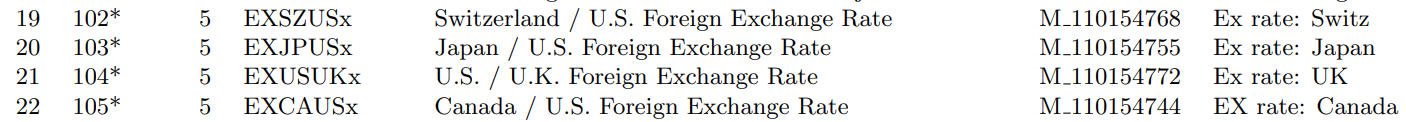
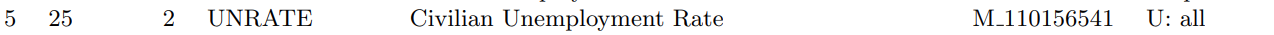

In [5]:
# Pulling the columns to be used
urate_dollar_df = fred_md[["EXSZUSx", "EXJPUSx", "EXUSUKx", "EXCAUSx", "UNRATE"]]
frequency = pd.infer_freq(fred_md.index)
urate_dollar_df.index = pd.DatetimeIndex(fred_md.index, freq=frequency)
urate_dollar_df.head()

,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,UNRATE
sasdate,,,,,
1959-01-01,4.3122,359.8417,2.8065,0.9671,6.0
1959-02-01,4.3133,359.8417,2.8093,0.9748,5.9
1959-03-01,4.3228,359.8417,2.8127,0.9698,5.6
1959-04-01,4.3226,359.8417,2.8165,0.9636,5.2
1959-05-01,4.3228,359.8417,2.8145,0.9630,5.1


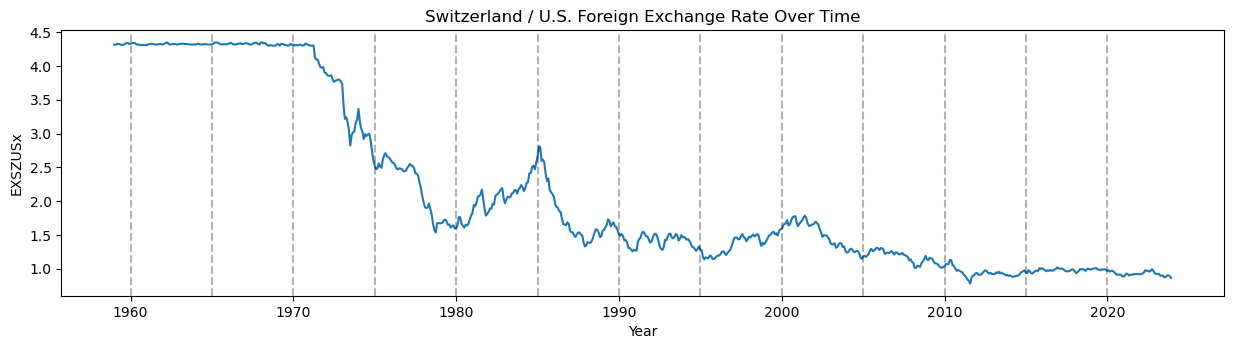

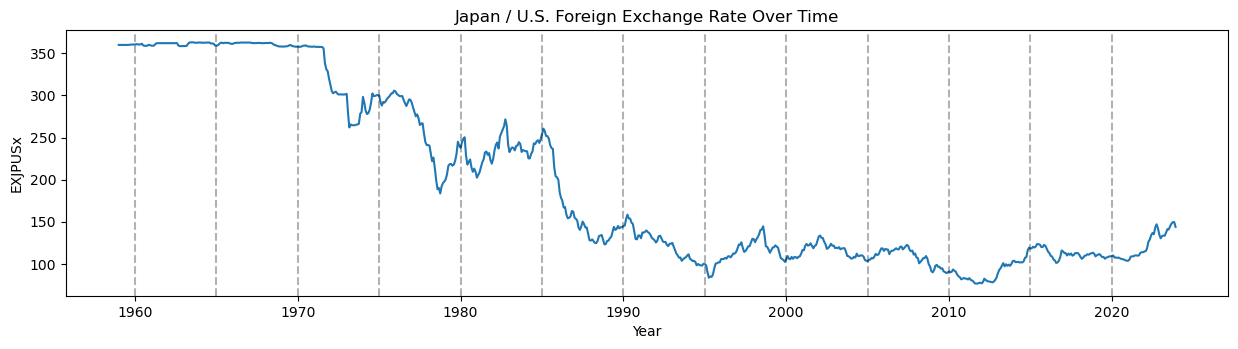

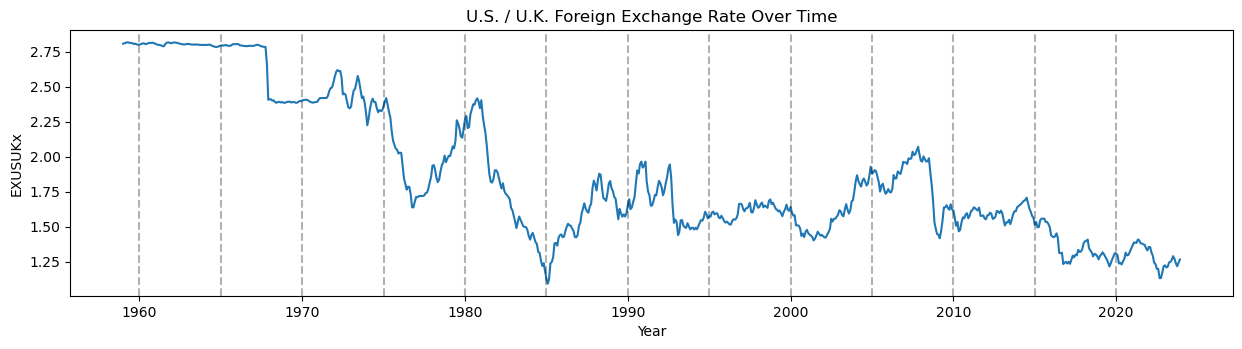

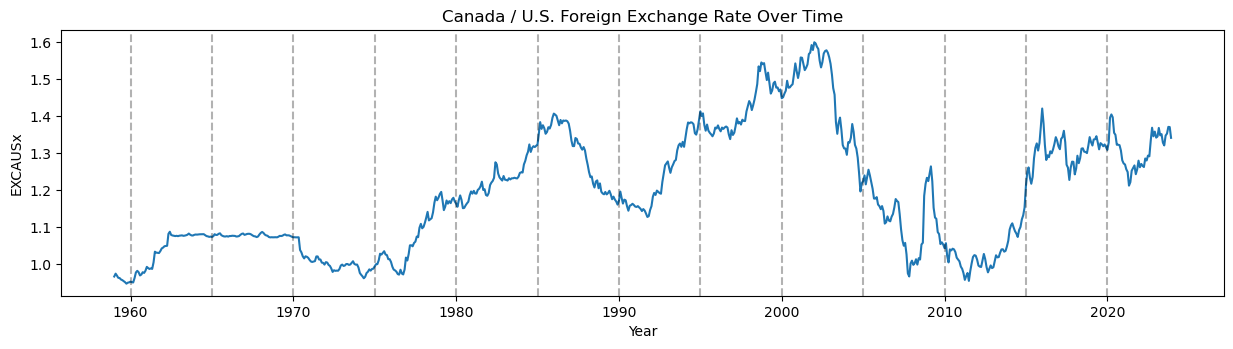

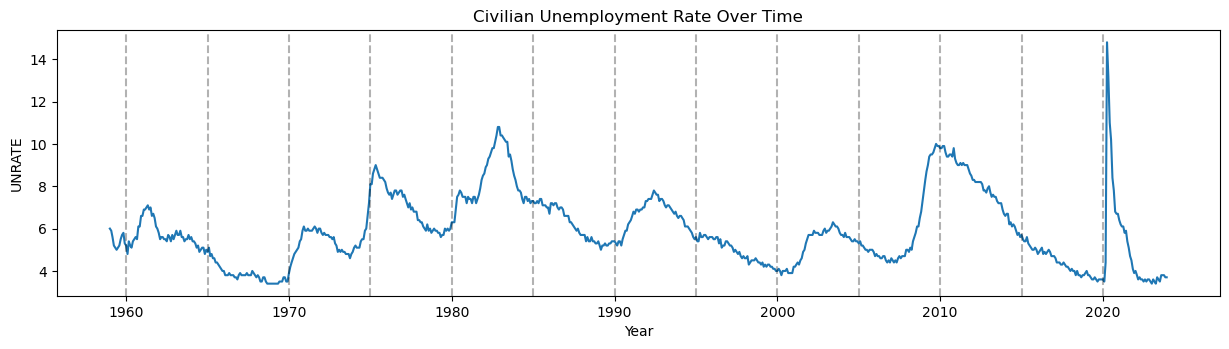

In [6]:
count = 1
for column in urate_dollar_df.columns:
    title_ = fred_md_metadata.loc[fred_md_metadata["fred"] == column, "description"].values[0]
    plt.figure(figsize=(15,20))
    plt.subplot(len(urate_dollar_df.columns), 1, count)
    plt.plot(urate_dollar_df[column])
    plt.title(f"{title_} Over Time")
    plt.xlabel("Year")
    plt.ylabel(f"{column}")
    for year in range (urate_dollar_df.index[0].year+1,urate_dollar_df.index[-1].year +1, 5):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)
    count += 1

__Takeaways From The Plots:__

1. There don't seem to be any seasonal patterns in any of these measures.
2. In terms of the relationship between the U.S. dollar and Japanese, English, and Swiss currencies, the U.S. dollar seemed to have been considerably stronger until the 1970s. Since then, the relationships have fluctuated -- perhaps because the U.S. began importing more goods. However, it should still be noted that the U.S. dollar has been consistently stronger than these other currencies.
3. There is a major spike in unemployment in 2020 due to COVID-19; it will be interesting to see how the various Neural Networks react to this spike.

### CNN

In [7]:
# Pre-processing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_np = scaler.fit_transform(urate_dollar_df.to_numpy())
scaled_df = pd.DataFrame(scaled_np, columns = ["EXSZUSx", "EXJPUSx", "EXUSUKx", "EXCAUSx", "UNRATE"])
scaled_df.index = urate_dollar_df.index
scaled_df.head()

,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,UNRATE
sasdate,,,,,
1959-01-01,1.778506,1.626809,1.877341,-1.414157,0.054052
1959-02-01,1.779390,1.626809,1.882991,-1.366510,-0.005413
1959-03-01,1.787025,1.626809,1.889852,-1.397450,-0.183806
1959-04-01,1.786864,1.626809,1.897519,-1.435815,-0.421664
1959-05-01,1.787025,1.626809,1.893484,-1.439528,-0.481129


In [8]:
# Function from https://colab.research.google.com/drive/1b3CUJuDOmPmNdZFH3LQDmt5F0K3FZhqD?usp=sharing#scrollTo=7EViSFyntz9j
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

In [9]:
cnn_x_sz, cnn_y_sz = df_to_X_y(scaled_df[["EXSZUSx", "UNRATE"]], 4)
cnn_x_jp, cnn_y_jp = df_to_X_y(scaled_df[["EXJPUSx", "UNRATE"]], 4)
cnn_x_uk, cnn_y_uk = df_to_X_y(scaled_df[["EXUSUKx", "UNRATE"]], 4)
cnn_x_ca, cnn_y_ca = df_to_X_y(scaled_df[["EXCAUSx", "UNRATE"]], 4)
cnn_x_ca.shape

(776, 4, 2)

In [10]:
TRAIN = 499
VAL = 650

x_sz_train, x_sz_val, x_sz_test = cnn_x_sz[:TRAIN], cnn_x_sz[TRAIN:VAL], cnn_x_sz[VAL:]
x_jp_train, x_jp_val, x_jp_test = cnn_x_jp[:TRAIN], cnn_x_jp[TRAIN:VAL], cnn_x_jp[VAL:]
x_uk_train, x_uk_val, x_uk_test = cnn_x_uk[:TRAIN], cnn_x_uk[TRAIN:VAL], cnn_x_uk[VAL:]
x_ca_train, x_ca_val, x_ca_test = cnn_x_ca[:TRAIN], cnn_x_ca[TRAIN:VAL], cnn_x_ca[VAL:]

y_sz_train, y_sz_val, y_sz_test = cnn_y_sz[:TRAIN], cnn_y_sz[TRAIN:VAL], cnn_y_sz[VAL:]
y_jp_train, y_jp_val, y_jp_test = cnn_y_jp[:TRAIN], cnn_y_jp[TRAIN:VAL], cnn_y_jp[VAL:]
y_uk_train, y_uk_val, y_uk_test = cnn_y_uk[:TRAIN], cnn_y_uk[TRAIN:VAL], cnn_y_uk[VAL:]
y_ca_train, y_ca_val, y_ca_test = cnn_y_ca[:TRAIN], cnn_y_ca[TRAIN:VAL], cnn_y_ca[VAL:]

In [11]:
def create_cnn():
    CNN = models.Sequential()
    CNN.add(InputLayer((4, 2)))
    CNN.add(Conv1D(64, kernel_size = 2, activation = "tanh"))
    CNN.add(Flatten())
    CNN.add(Dense(1, "linear"))
    CNN.compile(optimizer='adam', loss='mse')
    return CNN

cnn_sz = create_cnn()
cnn_jp = create_cnn()
cnn_uk = create_cnn()
cnn_ca = create_cnn()


In [12]:
cnn_sz.fit(x_sz_train, y_sz_train, validation_data = (x_sz_val, y_sz_val),epochs=15)
print("SZ done")
cnn_jp.fit(x_jp_train, y_jp_train, validation_data = (x_jp_val, y_jp_val),epochs=15)
print("JP done")
cnn_uk.fit(x_uk_train, y_uk_train, validation_data = (x_uk_val, y_uk_val),epochs=15)
print("UK done")
cnn_ca.fit(x_ca_train, y_ca_train, validation_data = (x_ca_val, y_ca_val),epochs=15)
print("CA done")

Epoch 1/15
16/16 [==============================] - 1s 20ms/step - loss: 0.1269 - val_loss: 0.0055
Epoch 2/15
16/16 [==============================] - 0s 5ms/step - loss: 0.0212 - val_loss: 0.0034
Epoch 3/15
16/16 [==============================] - 0s 6ms/step - loss: 0.0083 - val_loss: 0.0075
Epoch 4/15
16/16 [==============================] - 0s 5ms/step - loss: 0.0068 - val_loss: 0.0034
Epoch 5/15
16/16 [==============================] - 0s 5ms/step - loss: 0.0065 - val_loss: 0.0042
Epoch 6/15
16/16 [==============================] - 0s 5ms/step - loss: 0.0063 - val_loss: 0.0036
Epoch 7/15
16/16 [==============================] - 0s 5ms/step - loss: 0.0062 - val_loss: 0.0039
Epoch 8/15
16/16 [==============================] - 0s 5ms/step - loss: 0.0063 - val_loss: 0.0037
Epoch 9/15
16/16 [==============================] - 0s 5ms/step - loss: 0.0062 - val_loss: 0.0037
Epoch 10/15
16/16 [==============================] - 0s 5ms/step - loss: 0.0060 - val_loss: 0.0039
Epoch 11/15
16/16 

In [13]:
sz_preds = cnn_sz.predict(x_sz_test)
jp_preds = cnn_jp.predict(x_jp_test)
uk_preds = cnn_uk.predict(x_uk_test)
ca_preds = cnn_ca.predict(x_ca_test)

4/4 [==============================] - 0s 3ms/step


In [14]:
preds_dict = {
    "sz_preds":sz_preds.reshape(1,-1)[0],
    "jp_preds":jp_preds.reshape(1,-1)[0],
    "uk_preds":uk_preds.reshape(1,-1)[0],
    "ca_preds":ca_preds.reshape(1,-1)[0],
    "urate":scaled_np[VAL+4:,-1].reshape(1,-1)[0],
}

unscaled_preds_np = scaler.inverse_transform(pd.DataFrame(preds_dict).to_numpy())
unscaled_preds_df = pd.DataFrame(unscaled_preds_np, columns = ["EXSZUSx_preds", "EXJPUSx_preds", "EXUSUKx_preds", "EXCAUSx_preds", "UNRATE"])

In [15]:
unscaled_preds_df.index = urate_dollar_df.index[VAL+4:]
unscaled_preds_df.head()

,EXSZUSx_preds,EXJPUSx_preds,EXUSUKx_preds,EXCAUSx_preds,UNRATE
sasdate,,,,,
2013-07-01,0.912152,98.651630,1.520178,1.027499,7.3
2013-08-01,0.926989,98.300957,1.517842,1.032814,7.2
2013-09-01,0.903053,97.030017,1.520962,1.037582,7.2
2013-10-01,0.899490,97.723824,1.537031,1.042015,7.2
2013-11-01,0.889112,97.376675,1.563422,1.041421,6.9


In [16]:
unscaled_preds_df

,EXSZUSx_preds,EXJPUSx_preds,EXUSUKx_preds,EXCAUSx_preds,UNRATE
sasdate,,,,,
2013-07-01,0.912152,98.651630,1.520178,1.027499,7.3
2013-08-01,0.926989,98.300957,1.517842,1.032814,7.2
2013-09-01,0.903053,97.030017,1.520962,1.037582,7.2
2013-10-01,0.899490,97.723824,1.537031,1.042015,7.2
2013-11-01,0.889112,97.376675,1.563422,1.041421,6.9
...,...,...,...,...,...
2023-08-01,0.989156,140.274724,1.328089,1.333471,3.8
2023-09-01,0.972231,142.845846,1.327095,1.337559,3.8
2023-10-01,0.990924,145.269390,1.310183,1.338951,3.8


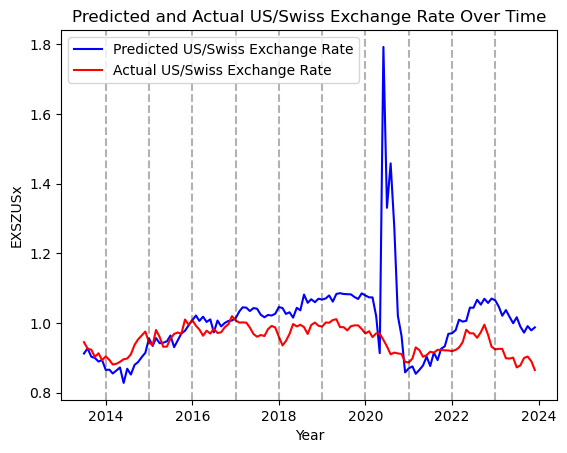

In [17]:
plt.plot(unscaled_preds_df["EXSZUSx_preds"], color = "blue", label = "Predicted US/Swiss Exchange Rate")
plt.plot(urate_dollar_df["EXSZUSx"][VAL+4:], color = "red", label = "Actual US/Swiss Exchange Rate")
plt.legend()
plt.xlabel("Year")
plt.ylabel("EXSZUSx")
plt.title("Predicted and Actual US/Swiss Exchange Rate Over Time")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

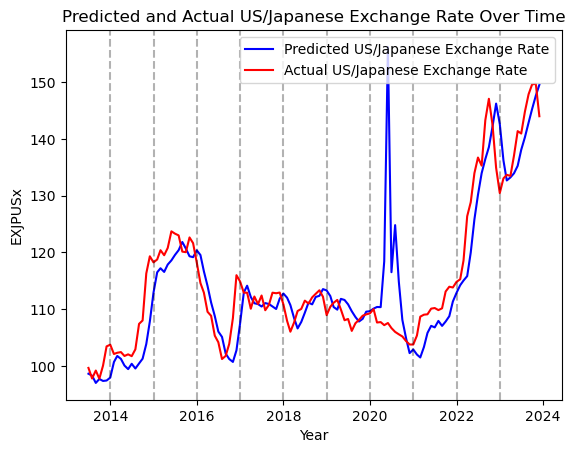

In [18]:
plt.plot(unscaled_preds_df["EXJPUSx_preds"], color = "blue", label = "Predicted US/Japanese Exchange Rate")
plt.plot(urate_dollar_df["EXJPUSx"][VAL+4:], color = "red", label = "Actual US/Japanese Exchange Rate")
plt.legend()
plt.xlabel("Year")
plt.ylabel("EXJPUSx")
plt.title("Predicted and Actual US/Japanese Exchange Rate Over Time")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

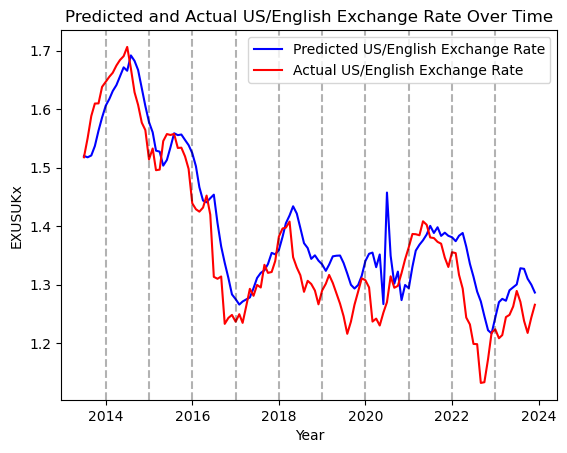

In [19]:
plt.plot(unscaled_preds_df["EXUSUKx_preds"], color = "blue", label = "Predicted US/English Exchange Rate")
plt.plot(urate_dollar_df["EXUSUKx"][VAL+4:], color = "red", label = "Actual US/English Exchange Rate")
plt.legend()
plt.xlabel("Year")
plt.ylabel("EXUSUKx")
plt.title("Predicted and Actual US/English Exchange Rate Over Time")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

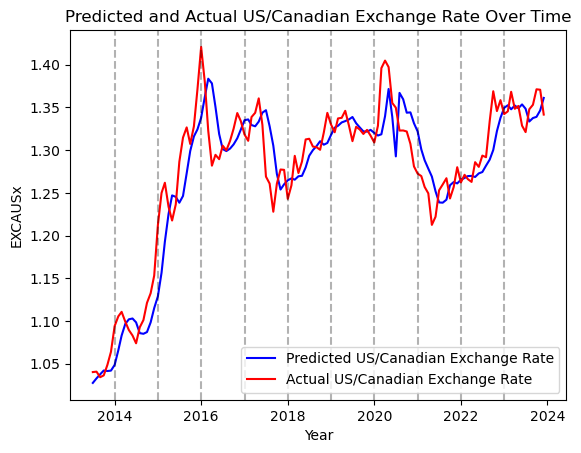

In [20]:
plt.plot(unscaled_preds_df["EXCAUSx_preds"], color = "blue", label = "Predicted US/Canadian Exchange Rate")
plt.plot(urate_dollar_df["EXCAUSx"][VAL+4:], color = "red", label = "Actual US/Canadian Exchange Rate")
plt.legend()
plt.xlabel("Year")
plt.ylabel("EXCAUSx")
plt.title("Predicted and Actual US/Canadian Exchange Rate Over Time")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

__Predicting Exchange Rates Without Unemplyment Rate__

In [21]:
def df_to_X_y2(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[r] for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

sz_rate_x, sz_rate_y = df_to_X_y2(fred_md["EXSZUSx"], 3)
jp_rate_x, jp_rate_y = df_to_X_y2(fred_md["EXJPUSx"], 3)
uk_rate_x, uk_rate_y = df_to_X_y2(fred_md["EXUSUKx"], 3)
ca_rate_x, ca_rate_y = df_to_X_y2(fred_md["EXCAUSx"], 3)

In [22]:
x_sz_train2, x_sz_val2, x_sz_test2 = sz_rate_x[:TRAIN], sz_rate_x[TRAIN:VAL], sz_rate_x[VAL:]
x_jp_train2, x_jp_val2, x_jp_test2 = jp_rate_x[:TRAIN], jp_rate_x[TRAIN:VAL], jp_rate_x[VAL:]
x_uk_train2, x_uk_val2, x_uk_test2 = uk_rate_x[:TRAIN], uk_rate_x[TRAIN:VAL], uk_rate_x[VAL:]
x_ca_train2, x_ca_val2, x_ca_test2 = ca_rate_x[:TRAIN], ca_rate_x[TRAIN:VAL], ca_rate_x[VAL:]

y_sz_train2, y_sz_val2, y_sz_test2 = sz_rate_y[:TRAIN], sz_rate_y[TRAIN:VAL], sz_rate_y[VAL:]
y_jp_train2, y_jp_val2, y_jp_test2 = jp_rate_y[:TRAIN], jp_rate_y[TRAIN:VAL], jp_rate_y[VAL:]
y_uk_train2, y_uk_val2, y_uk_test2 = uk_rate_y[:TRAIN], uk_rate_y[TRAIN:VAL], uk_rate_y[VAL:]
y_ca_train2, y_ca_val2, y_ca_test2 = ca_rate_y[:TRAIN], ca_rate_y[TRAIN:VAL], ca_rate_y[VAL:]

In [23]:
def create_cnn2():
    CNN = models.Sequential()
    CNN.add(InputLayer((3, 1)))
    CNN.add(Conv1D(64, kernel_size = 3, activation = "tanh"))
    CNN.add(Flatten())
    CNN.add(Dense(8, "relu"))
    CNN.add(Dense(4, "relu"))
    CNN.add(Dense(1, "linear"))
    CNN.compile(optimizer='adam', loss='mse')
    return CNN

cnn_sz2 = create_cnn2()
cnn_jp2 = create_cnn2()
cnn_uk2 = create_cnn2()
cnn_ca2 = create_cnn2()

In [24]:
cnn_sz2.fit(x_sz_train2, y_sz_train2, validation_data = (x_sz_val2, y_sz_val2),epochs=25)
print("SZ done")
cnn_jp2.fit(x_jp_train2, y_jp_train2, validation_data = (x_jp_val2, y_jp_val2),epochs=25)
print("JP done")
cnn_uk2.fit(x_uk_train2, y_uk_train2, validation_data = (x_uk_val2, y_uk_val2),epochs=25)
print("UK done")
cnn_ca2.fit(x_ca_train2, y_ca_train2, validation_data = (x_ca_val2, y_ca_val2),epochs=25)
print("CA done")

Epoch 1/25
16/16 [==============================] - 1s 14ms/step - loss: 8.1149 - val_loss: 1.3055
Epoch 2/25
16/16 [==============================] - 0s 5ms/step - loss: 7.2235 - val_loss: 1.0262
Epoch 3/25
16/16 [==============================] - 0s 4ms/step - loss: 6.0222 - val_loss: 0.6753
Epoch 4/25
16/16 [==============================] - 0s 5ms/step - loss: 4.5257 - val_loss: 0.3013
Epoch 5/25
16/16 [==============================] - 0s 6ms/step - loss: 2.8765 - val_loss: 0.0398
Epoch 6/25
16/16 [==============================] - 0s 7ms/step - loss: 1.4789 - val_loss: 0.0743
Epoch 7/25
16/16 [==============================] - 0s 7ms/step - loss: 0.6836 - val_loss: 0.3570
Epoch 8/25
16/16 [==============================] - 0s 6ms/step - loss: 0.4745 - val_loss: 0.5000
Epoch 9/25
16/16 [==============================] - 0s 8ms/step - loss: 0.4313 - val_loss: 0.4217
Epoch 10/25
16/16 [==============================] - 0s 7ms/step - loss: 0.3806 - val_loss: 0.3359
Epoch 11/25
16/16 

In [25]:
sz_preds2 = cnn_sz2.predict(x_sz_test2)
jp_preds2 = cnn_jp2.predict(x_jp_test2)
uk_preds2 = cnn_uk2.predict(x_uk_test2)
ca_preds2 = cnn_ca2.predict(x_ca_test2)

4/4 [==============================] - 0s 2ms/step


In [26]:
def create_LSTM():
    lstm = models.Sequential()
    lstm.add(InputLayer((3, 1)))
    lstm.add(LSTM(64))
    lstm.add(Dense(4, "relu"))
    lstm.add(Dense(1, "linear"))
    lstm.compile(optimizer='adam', loss='mse')
    return lstm

In [27]:
lstm_sz = create_LSTM()
lstm_sz.fit(x_sz_train2, y_sz_train2, validation_data = (x_sz_val2, y_sz_val2),epochs=15)
print("SZ done")

Epoch 1/15
16/16 [==============================] - 3s 44ms/step - loss: 8.0759 - val_loss: 1.0751
Epoch 2/15
16/16 [==============================] - 0s 8ms/step - loss: 5.6533 - val_loss: 0.6448
Epoch 3/15
16/16 [==============================] - 0s 7ms/step - loss: 3.4731 - val_loss: 0.1916
Epoch 4/15
16/16 [==============================] - 0s 8ms/step - loss: 1.2713 - val_loss: 0.0178
Epoch 5/15
16/16 [==============================] - 0s 9ms/step - loss: 0.2317 - val_loss: 0.2468
Epoch 6/15
16/16 [==============================] - 0s 7ms/step - loss: 0.1800 - val_loss: 0.1281
Epoch 7/15
16/16 [==============================] - 0s 9ms/step - loss: 0.1113 - val_loss: 0.0518
Epoch 8/15
16/16 [==============================] - 0s 7ms/step - loss: 0.0790 - val_loss: 0.0386
Epoch 9/15
16/16 [==============================] - 0s 9ms/step - loss: 0.0547 - val_loss: 0.0241
Epoch 10/15
16/16 [==============================] - 0s 8ms/step - loss: 0.0386 - val_loss: 0.0111
Epoch 11/15
16/16 

In [28]:
sz_lstm_preds = lstm_sz.predict(x_sz_test2)

4/4 [==============================] - 1s 4ms/step


In [29]:
sz_lstm_preds = pd.Series(sz_lstm_preds.reshape(1,-1)[0])
sz_lstm_preds.index = urate_dollar_df.index[VAL+3:]

In [30]:
sz_lstm_preds

sasdate
2013-06-01    0.916260
2013-07-01    0.914078
2013-08-01    0.916607
2013-09-01    0.907684
2013-10-01    0.905585
                ...   
2023-08-01    0.868233
2023-09-01    0.861300
2023-10-01    0.856409
2023-11-01    0.866480
2023-12-01    0.873539
Freq: MS, Length: 127, dtype: float32

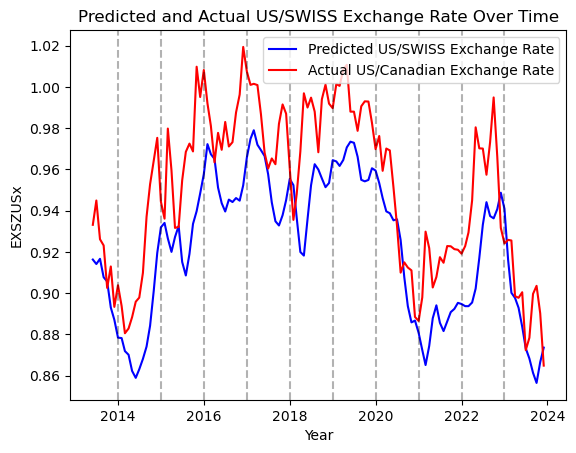

In [31]:
plt.plot(sz_lstm_preds, color = "blue", label = "Predicted US/SWISS Exchange Rate")
plt.plot(urate_dollar_df["EXSZUSx"][VAL+3:], color = "red", label = "Actual US/Canadian Exchange Rate")
plt.legend()
plt.xlabel("Year")
plt.ylabel("EXSZUSx")
plt.title("Predicted and Actual US/SWISS Exchange Rate Over Time")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

In [32]:
def create_LSTM2():
    lstm = models.Sequential()
    lstm.add(InputLayer((3, 2)))
    lstm.add(LSTM(64, return_sequences=True))
    lstm.add(LSTM(32))
    lstm.add(Dropout(0.2))
    lstm.add(Dense(1, "linear"))
    lstm.compile(optimizer='adam', loss='mse')
    return lstm

lstm_sz2 = create_LSTM2()
lstm_jp2 = create_LSTM2()
lstm_uk2 = create_LSTM2()
lstm_ca2 = create_LSTM2()

In [33]:
lstm_sz2.fit(x_sz_train, y_sz_train, validation_data = (x_sz_val, y_sz_val),epochs=45)
print("SZ done")
lstm_jp2.fit(x_jp_train, y_jp_train, validation_data = (x_jp_val, y_jp_val),epochs=45)
print("JP done")
lstm_uk2.fit(x_uk_train, y_uk_train, validation_data = (x_uk_val, y_uk_val),epochs=45)
print("UK done")
lstm_ca2.fit(x_ca_train, y_ca_train, validation_data = (x_ca_val, y_ca_val),epochs=45)
print("CA done")

Epoch 1/45


ValueError: in user code:

    File "C:\Users\charl\Anaconda\Lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\charl\Anaconda\Lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\charl\Anaconda\Lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\charl\Anaconda\Lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\charl\Anaconda\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\charl\Anaconda\Lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_9" is incompatible with the layer: expected shape=(None, 3, 2), found shape=(None, 4, 2)


In [ ]:
sz_preds3 = lstm_sz2.predict(x_sz_test)
jp_preds3 = lstm_jp2.predict(x_jp_test)
uk_preds3 = lstm_uk2.predict(x_uk_test)
ca_preds3 = lstm_ca2.predict(x_ca_test)

In [ ]:
scaler2 = StandardScaler()
scaler2.fit_transform(urate_dollar_df.to_numpy())
preds_dict3 = {
    "sz_preds":sz_preds3.reshape(1,-1)[0],
    "jp_preds":jp_preds3.reshape(1,-1)[0],
    "uk_preds":uk_preds3.reshape(1,-1)[0],
    "ca_preds":ca_preds3.reshape(1,-1)[0],
    "urate":scaled_np[VAL+3:,-1].reshape(1,-1)[0],
}

unscaled_preds_np3 = scaler2.inverse_transform(pd.DataFrame(preds_dict3).to_numpy())
unscaled_preds_df3 = pd.DataFrame(unscaled_preds_np3, columns = ["EXSZUSx_preds", "EXJPUSx_preds", "EXUSUKx_preds", "EXCAUSx_preds", "UNRATE"])

In [ ]:
unscaled_preds_df3.index = urate_dollar_df.index[VAL+3:]
unscaled_preds_df3.head()

In [ ]:
plt.plot(unscaled_preds_df3["EXSZUSx_preds"], color = "blue", label = "Predicted US/Swiss Exchange Rate")
plt.plot(urate_dollar_df["EXSZUSx"][VAL+3:], color = "red", label = "Actual US/Swiss Exchange Rate")
plt.legend()
plt.xlabel("Year")
plt.ylabel("EXSZUSx")
plt.title("Predicted and Actual US/Swiss Exchange Rate Over Time")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

In [ ]:
plt.plot(unscaled_preds_df3["EXJPUSx_preds"], color = "blue", label = "Predicted US/Japanese Exchange Rate")
plt.plot(urate_dollar_df["EXJPUSx"][VAL+3:], color = "red", label = "Actual US/Japanese Exchange Rate")
plt.legend()
plt.xlabel("Year")
plt.ylabel("EXJPUSx")
plt.title("Predicted and Actual US/Japanese Exchange Rate Over Time")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

In [ ]:
plt.plot(unscaled_preds_df3["EXUSUKx_preds"], color = "blue", label = "Predicted US/English Exchange Rate")
plt.plot(urate_dollar_df["EXUSUKx"][VAL+3:], color = "red", label = "Actual US/English Exchange Rate")
plt.legend()
plt.xlabel("Year")
plt.ylabel("EXUSUKx")
plt.title("Predicted and Actual US/English Exchange Rate Over Time")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

In [ ]:
plt.plot(unscaled_preds_df3["EXCAUSx_preds"], color = "blue", label = "Predicted US/Canadian Exchange Rate")
plt.plot(urate_dollar_df["EXCAUSx"][VAL+3:], color = "red", label = "Actual US/Canadian Exchange Rate")
plt.legend()
plt.xlabel("Year")
plt.ylabel("EXCAUSx")
plt.title("Predicted and Actual US/Canadian Exchange Rate Over Time")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

### RPI and M1 Money Stock

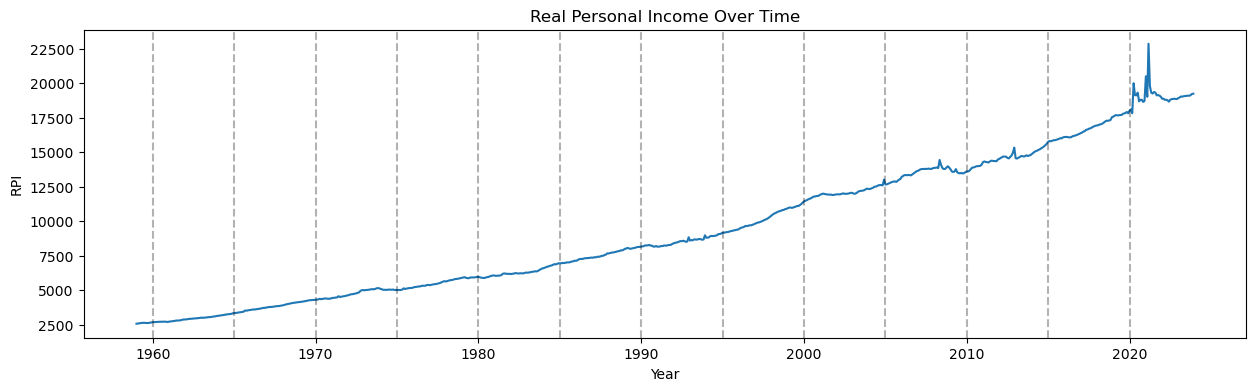

In [34]:
title_ = fred_md_metadata.loc[fred_md_metadata["fred"] == "RPI", "description"].values[0]
plt.figure(figsize=(15,4))
plt.plot(fred_md["RPI"])
plt.title(f"{title_} Over Time")
plt.xlabel("Year")
plt.ylabel(f"RPI")
for year in range (urate_dollar_df.index[0].year+1,urate_dollar_df.index[-1].year +1, 5):
    plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

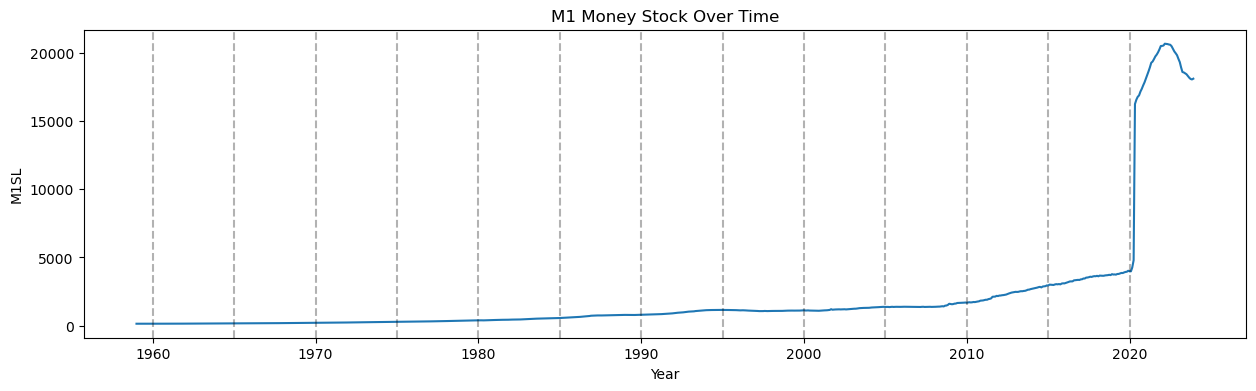

In [35]:
title_ = fred_md_metadata.loc[fred_md_metadata["fred"] == "M1SL", "description"].values[0]
plt.figure(figsize=(15,4))
plt.plot(fred_md["M1SL"])
plt.title(f"{title_} Over Time")
plt.xlabel("Year")
plt.ylabel(f"M1SL")
for year in range (urate_dollar_df.index[0].year+1,urate_dollar_df.index[-1].year +1, 5):
    plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

In [36]:
m1_rpi = fred_md[["RPI", "M1SL"]]
scaler4 = StandardScaler()
scaled_np4 = scaler4.fit_transform(m1_rpi.to_numpy())
scaled_df4 = pd.DataFrame(scaled_np4, columns = ["RPI", "M1SL"])
scaled_df4.index = urate_dollar_df.index
scaled_df4.tail()


,RPI,M1SL
sasdate,,
2023-08-01,1.972238,3.809722
2023-09-01,1.970259,3.778808
2023-10-01,1.979457,3.757511
2023-11-01,1.997052,3.749302
2023-12-01,2.000565,3.762320


In [56]:
TRAIN, VAL

(499, 650)

In [37]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

In [38]:
x_train4, y_train4 = df_to_X_y(scaled_df4, 5)
x_train4_, x_val4, x_test4 = x_train4[:TRAIN], x_train4[TRAIN:VAL], x_train4[VAL:]
y_train4_, y_val4, y_test4 = y_train4[:TRAIN], y_train4[TRAIN:VAL], y_train4[VAL:]

In [39]:
def create_cnn4():
    cnn = models.Sequential()
    cnn.add(InputLayer((5, 2)))
    cnn.add(Conv1D(64, kernel_size = 2, activation="tanh"))
    cnn.add(Flatten())
    cnn.add(Dense(8, "relu"))
    cnn.add(Dense(1, "linear"))
    cnn.compile(optimizer='adam', loss='mse')
    return cnn

def create_gru4():
    gru = models.Sequential()
    gru.add(InputLayer((5, 2)))
    gru.add(GRU(64))
    gru.add(Dense(8, "relu"))
    gru.add(Dense(1, "linear"))
    gru.compile(optimizer='adam', loss='mse')
    return gru

def create_lstm4():
    lstm = models.Sequential()
    lstm.add(InputLayer((5, 2)))
    lstm.add(LSTM(64))
    lstm.add(Dense(8, "relu"))
    lstm.add(Dense(1, "linear"))
    lstm.compile(optimizer='adam', loss='mse')
    return lstm

def double_lstm():
    lstm = models.Sequential()
    lstm.add(InputLayer((5, 2)))
    lstm.add(LSTM(32, return_sequences = True))
    lstm.add(LSTM(64))
    lstm.add(Dense(8, "relu"))
    lstm.add(Dense(1, "linear"))
    lstm.compile(optimizer='adam', loss='mse')
    return lstm

In [40]:
cnn4 = create_cnn4()
gru4 = create_gru4()
lstm4 = create_lstm4()
double_lstm4 = double_lstm()

In [41]:
cnn4.fit(x_train4, y_train4, validation_data = (x_val4, y_val4), epochs = 15)
gru4.fit(x_train4, y_train4, validation_data = (x_val4, y_val4), epochs = 15)
lstm4.fit(x_train4, y_train4, validation_data = (x_val4, y_val4), epochs = 15)
double_lstm4.fit(x_train4, y_train4, validation_data = (x_val4, y_val4), epochs = 15)

Epoch 1/15
25/25 [==============================] - 1s 10ms/step - loss: 0.3650 - val_loss: 0.0079
Epoch 2/15
25/25 [==============================] - 0s 3ms/step - loss: 0.0174 - val_loss: 0.0015
Epoch 3/15
25/25 [==============================] - 0s 4ms/step - loss: 0.0040 - val_loss: 0.0010
Epoch 4/15
25/25 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 5/15
25/25 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 6/15
25/25 [==============================] - 0s 4ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 7/15
25/25 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 8/15
25/25 [==============================] - 0s 5ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 9/15
25/25 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 10/15
25/25 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0010
Epoch 11/15
25/25 

In [42]:
cnn4.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 4, 64)             320       
                                                                 
 flatten_8 (Flatten)         (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 8)                 2056      
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,385
Trainable params: 2,385
Non-trainable params: 0
_________________________________________________________________


In [43]:
gru4.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                13056     
                                                                 
 dense_24 (Dense)            (None, 8)                 520       
                                                                 
 dense_25 (Dense)            (None, 1)                 9         
                                                                 
Total params: 13,585
Trainable params: 13,585
Non-trainable params: 0
_________________________________________________________________


In [44]:
lstm4.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 64)                17152     
                                                                 
 dense_26 (Dense)            (None, 8)                 520       
                                                                 
 dense_27 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,681
Trainable params: 17,681
Non-trainable params: 0
_________________________________________________________________


In [45]:
double_lstm4.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 5, 32)             4480      
                                                                 
 lstm_11 (LSTM)              (None, 64)                24832     
                                                                 
 dense_28 (Dense)            (None, 8)                 520       
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 29,841
Trainable params: 29,841
Non-trainable params: 0
_________________________________________________________________


In [46]:
cnn4_preds = cnn4.predict(x_test4)
gru4_preds = gru4.predict(x_test4)
lstm4_preds = lstm4.predict(x_test4)
double_lstm4_preds = double_lstm4.predict(x_test4)

4/4 [==============================] - 1s 4ms/step


In [47]:
preds_cnn_dict = {
    "CNN_Preds":cnn4_preds.reshape(1,-1)[0],
    "M1":scaled_np4[VAL+5:,-1].reshape(1,-1)[0],
}

preds_cnn_dict
unscaled_preds_cnn = scaler4.inverse_transform(pd.DataFrame(preds_cnn_dict).to_numpy())
unscaled_preds_df = pd.DataFrame(unscaled_preds_cnn, columns = ["CNN_Preds", "M1"])
unscaled_preds_df.index = fred_md.index[VAL+5:]

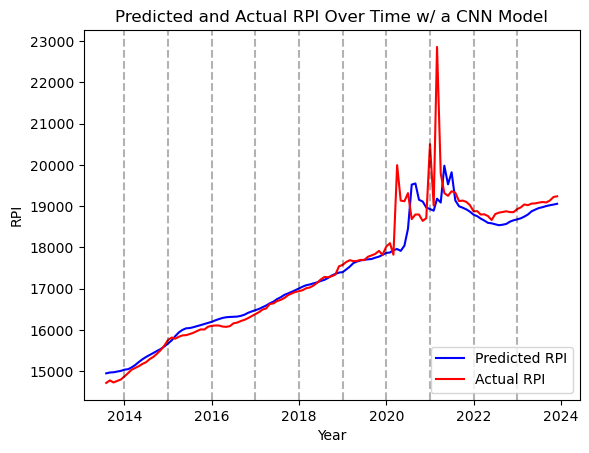

In [48]:
plt.plot(unscaled_preds_df["CNN_Preds"], color = "blue", label = "Predicted RPI")
plt.plot(fred_md["RPI"][VAL+5:], color = "red", label = "Actual RPI")
plt.legend()
plt.xlabel("Year")
plt.ylabel("RPI")
plt.title("Predicted and Actual RPI Over Time w/ a CNN Model")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

In [49]:
preds_gru_dict = {
    "GRU_Preds":gru4_preds.reshape(1,-1)[0],
    "M1":scaled_np4[VAL+5:,-1].reshape(1,-1)[0],
}

unscaled_preds_gru = scaler4.inverse_transform(pd.DataFrame(preds_gru_dict).to_numpy())
unscaled_preds_df2 = pd.DataFrame(unscaled_preds_gru, columns = ["GRU_Preds", "M1"])
unscaled_preds_df2.index = fred_md.index[VAL+5:]

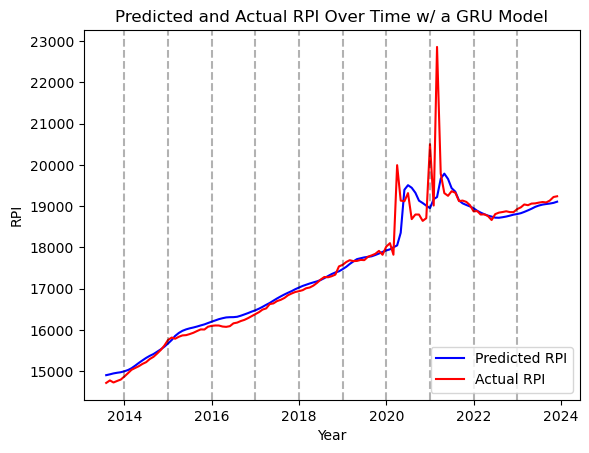

In [50]:
plt.plot(unscaled_preds_df2["GRU_Preds"], color = "blue", label = "Predicted RPI")
plt.plot(fred_md["RPI"][VAL+5:], color = "red", label = "Actual RPI")
plt.legend()
plt.xlabel("Year")
plt.ylabel("RPI")
plt.title("Predicted and Actual RPI Over Time w/ a GRU Model")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

In [51]:
preds_lstm_dict = {
    "LSTM_Preds":lstm4_preds.reshape(1,-1)[0],
    "M1":scaled_np4[VAL+5:,-1].reshape(1,-1)[0],
}

unscaled_preds_lstm = scaler4.inverse_transform(pd.DataFrame(preds_lstm_dict).to_numpy())
unscaled_preds_df3 = pd.DataFrame(unscaled_preds_lstm, columns = ["LSTM_Preds", "M1"])
unscaled_preds_df3.index = fred_md.index[VAL+5:]

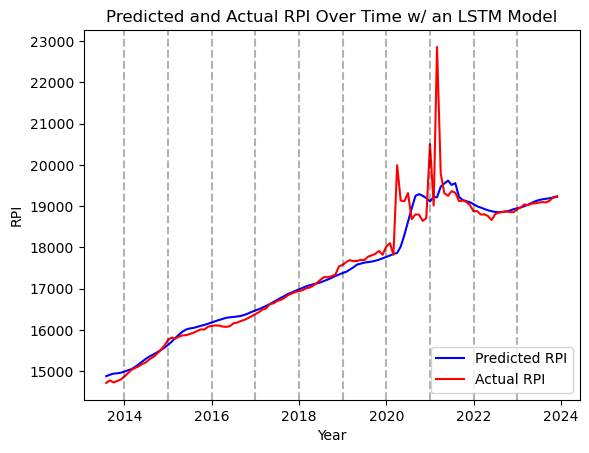

In [52]:
plt.plot(unscaled_preds_df3["LSTM_Preds"], color = "blue", label = "Predicted RPI")
plt.plot(fred_md["RPI"][VAL+5:], color = "red", label = "Actual RPI")
plt.legend()
plt.xlabel("Year")
plt.ylabel("RPI")
plt.title("Predicted and Actual RPI Over Time w/ an LSTM Model")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

In [53]:
preds_double_lstm_dict = {
    "Double_LSTM_Preds":double_lstm4_preds.reshape(1,-1)[0],
    "M1":scaled_np4[VAL+5:,-1].reshape(1,-1)[0],
}

unscaled_preds_double_lstm = scaler4.inverse_transform(pd.DataFrame(preds_double_lstm_dict).to_numpy())
unscaled_preds_df4 = pd.DataFrame(unscaled_preds_double_lstm, columns = ["Double_LSTM_Preds", "M1"])
unscaled_preds_df4.index = fred_md.index[VAL+5:]

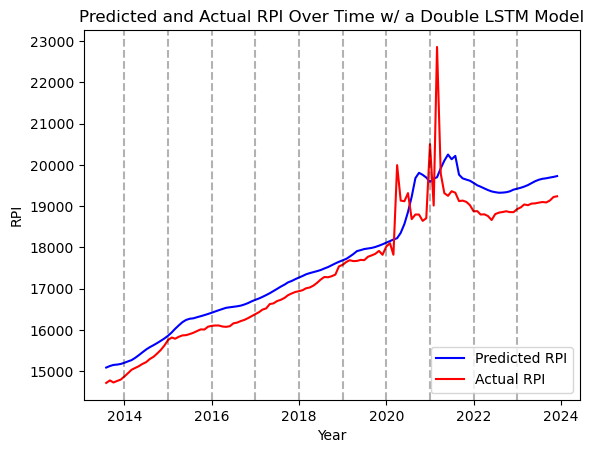

In [54]:
plt.plot(unscaled_preds_df4["Double_LSTM_Preds"], color = "blue", label = "Predicted RPI")
plt.plot(fred_md["RPI"][VAL+5:], color = "red", label = "Actual RPI")
plt.legend()
plt.xlabel("Year")
plt.ylabel("RPI")
plt.title("Predicted and Actual RPI Over Time w/ a Double LSTM Model")
for year in range (urate_dollar_df.index[VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
print(mean_absolute_percentage_error(unscaled_preds_df["CNN_Preds"], fred_md["RPI"][VAL+5:]))
print(mean_absolute_percentage_error(unscaled_preds_df2["GRU_Preds"], fred_md["RPI"][VAL+5:]))
print(mean_absolute_percentage_error(unscaled_preds_df3["LSTM_Preds"], fred_md["RPI"][VAL+5:]))
print(mean_absolute_percentage_error(unscaled_preds_df4["Double_LSTM_Preds"], fred_md["RPI"][VAL+5:]))

0.012784315054196803
0.00970772710675252
0.01036228767584342
0.02410070166222199


### Everything to Predict GDP?

In [ ]:
quarterly_data = fred_md.resample('Q').mean()

In [ ]:
gdp_quarter = pd.read_csv("data/GDPC1.csv")
gdp_quarter.index = quarterly_data.index[:len(quarterly_data)]
gdp_quarter = gdp_quarter.drop("DATE", axis = 1)
gdp_quarter.head()

In [ ]:
quarterly_data["GDP"] = gdp_quarter["GDPC1"]
quarterly_data = quarterly_data.dropna(axis=1)
quarterly_gdp = quarterly_data[["RPI", "HOUST", "CLF16OV", "GDP"]]

In [ ]:
scaler_gdp = StandardScaler()
scaler_gdp_np = scaler_gdp.fit_transform(quarterly_gdp.to_numpy())
quarterly_gdp_scaled = pd.DataFrame(scaler_gdp_np, columns = ["RPI", "HOUST", "CLF16OV", "GDP"])
quarterly_gdp_scaled.index = quarterly_data.index
quarterly_gdp_scaled

In [ ]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][-1]
        y.append(label)
    return np.array(X), np.array(y)

In [ ]:
GDP_TRAIN = 140
GDP_VAL = 200
gdp_pred_x, gdp_pred_y = df_to_X_y(quarterly_gdp_scaled, 2)
x_train_gdp, x_val_gdp, x_test_gdp = gdp_pred_x[:GDP_TRAIN], gdp_pred_x[GDP_TRAIN:GDP_VAL], gdp_pred_x[GDP_VAL:]
y_train_gdp, y_val_gdp, y_test_gdp = gdp_pred_y[:GDP_TRAIN], gdp_pred_y[GDP_TRAIN:GDP_VAL], gdp_pred_y[GDP_VAL:]

In [ ]:
from keras.regularizers import l1, l2
from keras import optimizers

def create_gdp_lstm(learning_rate=0.01):
    adam_optimizer = optimizers.Adam(learning_rate)
    lstm = models.Sequential()
    lstm.add(InputLayer((2,4)))
    lstm.add(LSTM(64, kernel_regularizer=l2(0.02), recurrent_regularizer=l2(0.02), 
               bias_regularizer=l2(0.02)))#, return_sequences=True))
    lstm.add(Dropout(0.2))
    #lstm.add(LSTM(32))
    lstm.add(Dense(1, 'linear'))
    lstm.compile(optimizer='adam', loss='mse')
    return lstm

In [ ]:
def create_gdp_gru():
    gru = models.Sequential()
    gru.add(InputLayer((2,4)))
    gru.add(LSTM(64, kernel_regularizer=l2(0.02), recurrent_regularizer=l2(0.02), 
               bias_regularizer=l2(0.02)))#, return_sequences=True))
    gru.add(Dropout(0.2))
    #lstm.add(LSTM(32))
    gru.add(Dense(1, 'linear'))
    gru.compile(optimizer='adam', loss='mse')
    return gru

In [ ]:
gdp_lstm = create_gdp_lstm()
gdp_gru = create_gdp_gru()
gdp_lstm.fit(x_train_gdp, y_train_gdp, validation_data=(x_val_gdp, y_val_gdp), epochs = 45)
gdp_gru.fit(x_train_gdp, y_train_gdp, validation_data=(x_val_gdp, y_val_gdp), epochs = 45)

In [ ]:
gdp_preds_lstm = gdp_lstm.predict(x_test_gdp)
gdp_preds_gru = gdp_gru.predict(x_test_gdp)

In [ ]:
preds_lstm_scaled = quarterly_gdp_scaled.drop("GDP", axis = 1)[GDP_VAL+2:]
preds_gru_scaled = quarterly_gdp_scaled.drop("GDP", axis = 1)[GDP_VAL+2:]
preds_lstm_scaled["GDP_preds"] = gdp_preds_lstm.reshape(1,-1)[0]
preds_gru_scaled["GDP_preds"] = gdp_preds_gru.reshape(1,-1)[0]

In [ ]:
lstm_scaled_preds = pd.DataFrame(scaler_gdp.inverse_transform(preds_lstm_scaled.to_numpy()), columns =["RPI", "HOUST", "CLF16OV", "GDP_preds"])
lstm_scaled_preds.index = quarterly_gdp_scaled.iloc[GDP_VAL+2:].index

In [ ]:
gru_scaled_preds = pd.DataFrame(scaler_gdp.inverse_transform(preds_gru_scaled.to_numpy()), columns =["RPI", "HOUST", "CLF16OV", "GDP_preds"])
gru_scaled_preds.index = quarterly_gdp_scaled.iloc[GDP_VAL+2:].index

In [ ]:
plt.plot(lstm_scaled_preds["GDP_preds"], color = "blue", label = "Predicted GDP")
plt.plot(quarterly_gdp["GDP"][GDP_VAL+2:], color = "red", label = "Actual GDP")
plt.legend()
plt.xlabel("Year")
plt.ylabel("RPI")
plt.title("Predicted and Actual GDP Over Time w/ an LSTM Model")
for year in range (quarterly_gdp.index[GDP_VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

In [ ]:
plt.plot(gru_scaled_preds["GDP_preds"], color = "blue", label = "Predicted GDP")
plt.plot(quarterly_gdp["GDP"][GDP_VAL+2:], color = "red", label = "Actual GDP")
plt.legend()
plt.xlabel("Year")
plt.ylabel("RPI")
plt.title("Predicted and Actual GDP Over Time w/ a GRU Model")
for year in range (quarterly_gdp.index[GDP_VAL].year+1,urate_dollar_df.index[-1].year +1, 1):
        plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', alpha = 0.3)

### Work Hours and Output

In [ ]:
confidence_output = fred_md[["FEDFUNDS", "UMCSENTx", "DPCERA3M086SBEA"]]#, "NAPMPI"]]
confidence_output = confidence_output[confidence_output.index > '1977-12-01']
confidence_output = confidence_output.iloc[:-1]
confidence_output

In [ ]:
real_consumption = fred_md["DPCERA3M086SBEA"]
real_consumption.head(6)

In [ ]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[r] for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

def create_lstm():
    lstm = models.Sequential()
    lstm.add(InputLayer((5, 1)))
    lstm.add(Conv1D(64, kernel_size = 2, activation="tanh"))
    lstm.add(Flatten())
    lstm.add(Dropout(0.3))
    lstm.add(Dense(1, "linear"))
    lstm.compile(optimizer='adam', loss='mse')
    return lstm


In [ ]:
TRAIN = 350
VAL = 550

rc_x, rc_y = df_to_X_y(pd.DataFrame(real_consumption), 5)
x_rc_train, x_rc_val, x_rc_test = rc_x[:TRAIN], rc_x[TRAIN:VAL],  rc_x[VAL:]
y_rc_train, y_rc_val, y_rc_test = rc_y[:TRAIN], rc_y[TRAIN:VAL],  rc_y[VAL:]

In [ ]:
y_rc_train.shape

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

rc_lstm = create_lstm()
rc_lstm.fit(x_rc_train, y_rc_train, validation_data=(x_rc_val, y_rc_val), epochs=150, callbacks=[early_stopping])